#**Data visualization**

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations.

These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets.

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations.

These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets.


**Advantages:**

* Easily sharing information.

* Interactively explore opportunities.

* Visualize patterns and relationships.

* Quickly see trends and outliers.

In [3]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
#from google.colab import files

## Visualisation

In [ ]:
# upload file to Colab
uploaded = files.upload()

In [4]:
# read the file into a variable
olympics = pd.read_csv('C:/University/University Files/University-Code/Sun/csv/olympics2024.csv')

In [5]:
# rename 'GDP per capita (current US$)'
olympics = olympics.rename(columns={'GDP per capita (current US$)' : 'GDPpc' })
olympics


,Rank,Country,Country Code,Continent,Gold,Silver,Bronze,Total,Population,GDPpc
0,1,United States,US,North America,40,44,42,126,3.349149e+08,71972.641370
1,2,China,CHN,Asia,40,27,24,91,1.410710e+09,11689.345810
2,3,Japan,JPN,Asia,20,12,13,45,1.245166e+08,37673.384700
3,4,Australia,AUS,Oceania,18,19,16,53,2.663854e+07,59480.901440
4,5,France,FRA,Europe,16,26,22,64,6.817023e+07,41738.604420
...,...,...,...,...,...,...,...,...,...,...
86,84,Peru,PER,South America,0,0,1,1,3.435272e+07,6949.323111
87,84,Qatar,QAT,Asia,0,0,1,1,2.716391e+06,67370.554620
88,84,Singapore,SIN,Asia,0,0,1,1,5.917648e+06,76062.578980
89,84,Slovakia,SVK,Europe,0,0,1,1,5.426740e+06,21290.114290


# Scatter Plot

<function matplotlib.pyplot.show(close=None, block=None)>

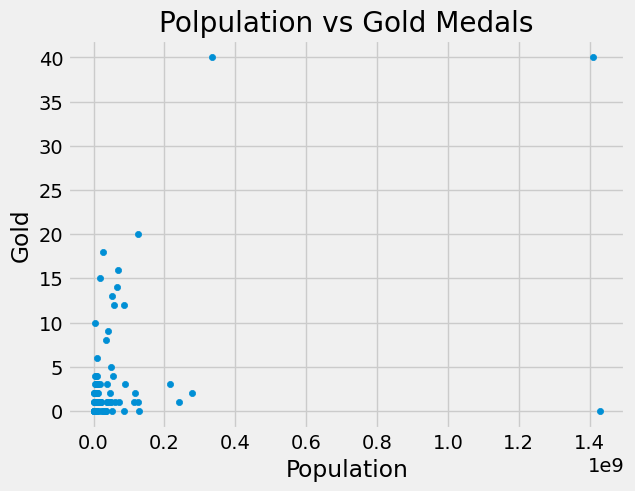

In [8]:
# use a scatter plot to see if there is a relationship between a country's
# polulation size and the number of gold medals the country obtained
olympics.plot.scatter(x='Population', y='Gold', title='Polpulation vs Gold Medals')
plots.show


In [ ]:
# zoom in to the countries with less than 400mil people
# needs to be updated
olympics.where(olympics['Polpulation'] > 40000000).dropna() y='Gold', title='Polpulation vs Gold Medals')
plots.show


Draw a scatter plot with Population on the x-axis, gold on the y-axis with countries from different continents having different colours.

In [ ]:
# make use of Seaborn


Let's determine visually what the relation is (if any) between GDP per capita and the number of medals obtained, highlighting each continent in a different colour.

In [ ]:
# make use of Seaborn


# moves legend to right



# Histogram

Text(0, 0.5, 'Frequency')

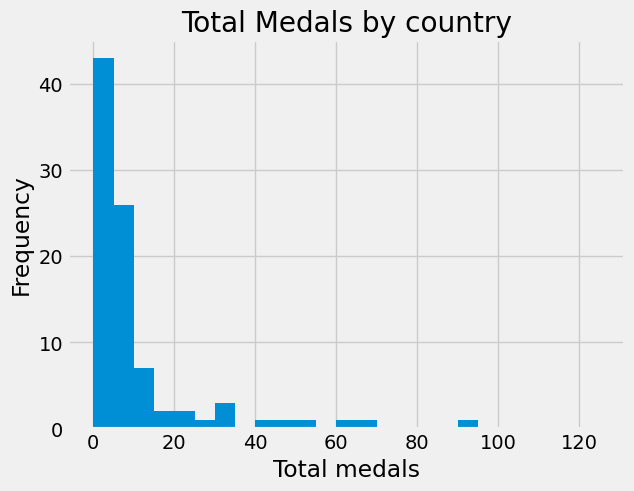

In [9]:
# Draw a histogram of Total medals
olympics.hist('Total', bins=np.arange(0, 130, 5))
plots.title('Total Medals by country')
plots.xlabel('Total medals')
plots.ylabel('Frequency')

In [10]:
# Create a histogram with Seaborn
sns.histplot(data=olympics, x='Total', hue='Continet', multiple='stack',bins=26)

# fix this
# Add labels
plots.title('Total Medals by country')
plots.xlabel('Total medals')
plots.ylabel('Frequency')

ValueError: Could not interpret value `Continet` for `hue`. An entry with this name does not appear in `data`.

# Bar Graph

In [11]:
# calculate the average medals of each type (gold, silver, bronze) obtained by
# each contiment
medal_aves = olympics.pivot_table(index='Continent', values=['Gold','Silver','Bronze'], aggfunc='mean')[['Gold','Silver','Bronze']]
medal_aves

,Gold,Silver,Bronze
Continent,,,
Africa,1.083333,1.000000,1.166667
Asia,4.260870,3.260870,3.913043
Europe,3.735294,4.088235,5.147059
Global,0.000000,0.000000,1.000000
North America,4.666667,5.000000,5.833333
Oceania,9.333333,9.000000,6.333333
South America,1.000000,2.333333,2.500000


In [ ]:
# create a barr graph


In [ ]:
# create a horizontal barr graph


# Pie Chart

Looking at only the European countries. Let's draw a pie chart of the percentage of gold medals each European country has obtained.

In [ ]:
# geneate a table with only the European countries gold medal counts
eu_gold = olympics.where(olympics['Continent'] == 'Europe').where(olympics['Gold'] > 0).dropna().sort_values('Gold', ascending=False)[['Country', 'Gold']]
eu_gold

In [ ]:
# create pie chart



Draw a pie chart of gold medals obtained where countries with less than 4 gold medals are group together in a single catagory (in a single pie section).

In [12]:
# group countries with less than 4 gold medals together
eu_gold_less4 = olympics.where(olympics['Continent'] == 'Europe').where(olympics['Gold'] < 4).dropna().sort_values('Gold', ascending=False)[['Country', 'Gold']]
# create a df with a summary of this data
eu_gold_less4_grouped = pd.DataFrame([['Other',eu_gold_less4['Gold'].sum()]],columns=['Country', 'Gold'])

# create a df with a subset of data with Euro countries with 4+ gold medals
eu_gold_min4 = olympics.where(olympics['Continent'] == 'Europe').where(olympics['Gold'] >= 4).dropna().sort_values('Gold', ascending=False)[['Country', 'Gold']]


In [13]:
# combine the dataframes
eu_gold2 = pd.concat([eu_gold_min4, eu_gold_less4_grouped])
eu_gold2

,Country,Gold
4,France,16.0
5,Netherlands,15.0
6,Great Britain,14.0
8,Italy,12.0
9,Germany,12.0
13,Hungary,6.0
14,Spain,5.0
15,Sweden,4.0
17,Norway,4.0
18,Ireland,4.0


([<matplotlib.patches.Wedge at 0x204c84bc4d0>,
 [Text(-0.4240921944286354, 1.014960989705863, 'France'),
  Text(-1.0096381369958287, 0.4366129090207849, 'Netherlands'),
  Text(-1.0478310872281338, -0.33473872294419027, 'Great Britain'),
  Text(-0.637726450784501, -0.8962728234024524, 'Italy'),
  Text(-0.027207781268404577, -1.0996634651739827, 'Germany'),
  Text(0.4490671834284305, -1.0041606767682434, 'Hungary'),
  Text(0.7024235803296218, -0.8465229552687367, 'Spain'),
  Text(0.8719982314477924, -0.6705364153809413, 'Sweden'),
  Text(0.9868105052134174, -0.48600928674300037, 'Norway'),
  Text(1.0631029536758367, -0.2825103712887579, 'Ireland'),
  Text(0.8377705972397167, 0.7128396919368398, 'Other')],
 [Text(-0.231323015142892, 0.553615085294107, '12.6%'),
  Text(-0.5507117110886338, 0.23815249582951903, '11.8%'),
  Text(-0.5715442293971638, -0.1825847579695583, '11.0%'),
  Text(-0.34785079133700053, -0.4888760854922467, '9.4%'),
  Text(-0.014840607964584312, -0.599816435549445, '9.4

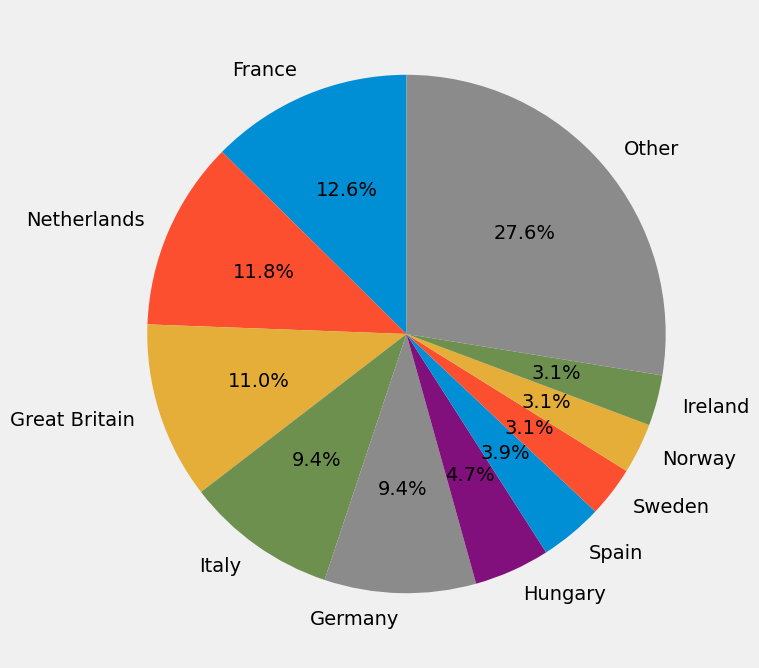

In [14]:
# create pie chart
plots.figure(figsize=(8, 8))  # Adjusting the figure size for better visualization
plots.pie(eu_gold2['Gold'], labels=eu_gold2['Country'], autopct='%1.1f%%', startangle=90)

# Spider Chart \ Radar Chart:

Visualize data across multiple categories for several groups.

In [15]:
# collect top 5 gold medal winning EU countries info
top5 = olympics.where(olympics['Continent'] == 'Europe').dropna().sort_values('Gold', ascending=False).head(5)
top5

,Rank,Country,Country Code,Continent,Gold,Silver,Bronze,Total,Population,GDPpc
4,5.0,France,FRA,Europe,16.0,26.0,22.0,64.0,68170228.0,41738.60442
5,6.0,Netherlands,NED,Europe,15.0,7.0,12.0,34.0,17879488.0,56585.69168
6,7.0,Great Britain,GBG,Europe,14.0,22.0,29.0,65.0,66970000.0,46125.26000
8,9.0,Italy,ITA,Europe,12.0,13.0,15.0,40.0,58761146.0,35095.94639
9,10.0,Germany,GER,Europe,12.0,13.0,8.0,33.0,84482267.0,49289.02237


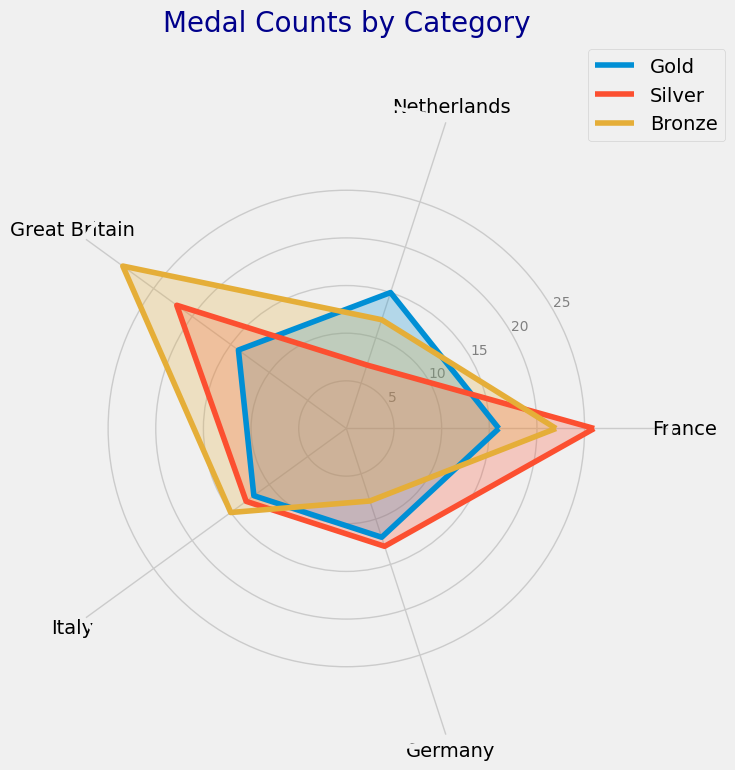

In [16]:
# create spider chart of top5's different medal types

top5=top5[['Country','Gold','Silver','Bronze']]

# Transpose the DataFrame so that countries are the axes
top5_transposed = top5.set_index('Country').T

# Set the catagories
categories = top5_transposed.columns.tolist()

# Compute the angle of each axis
angles = np.linspace(0, 2 * np.pi, 5, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start to the end.
angles += angles[:1]

# Initialize the spider plot
fig, ax = plots.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop to plot each medal category
for category in top5_transposed.index:
    values = top5_transposed.loc[category].tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, label=category)
    ax.fill(angles, values, alpha=0.25)  # Fill the area under the plot

# Labels for the countries
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Setting the range for the radial axis
ax.set_rlabel_position(30)
plots.yticks([5, 10, 15, 20, 25], ["5", "10", "15", "20", "25"], color="grey", size=10)
plots.ylim(0, top5_transposed.max().max() + 5)

# Title and legend
plots.title('Medal Counts by Category', size=20, color='darkblue', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


# Sankey Plot

In [17]:
# filter the olympics data
olympics_sankey = olympics.where(olympics['Total'] > 4).dropna()

In [18]:
# import libraries
import plotly.graph_objects as go
import numpy as np
import colorsys

# Medal categories in desired order
categories = ['Gold', 'Silver', 'Bronze']

# Sorting continents and countries alphabetically
continents = sorted(olympics_sankey['Continent'].unique())
countries = sorted(olympics_sankey['Country'])

# Define colours for medal categories
medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}

# Generate random colours for continents
np.random.seed(0)  # For reproducibility
continent_colors = {cont: f'#{np.random.randint(0, 256):02x}{np.random.randint(0, 256):02x}{np.random.randint(0, 256):02x}' for cont in continents}

# Function to generate shades of a colour
def generate_shades(base_color, num_shades):
    # Convert hex to RGB
    base_color = base_color.lstrip('#')
    r, g, b = int(base_color[0:2], 16), int(base_color[2:4], 16), int(base_color[4:6], 16)

    # Convert RGB to HSV
    h, s, v = colorsys.rgb_to_hsv(r/255., g/255., b/255.)

    # Generate shades by adjusting value (brightness)
    shades = []
    for i in range(num_shades):
        shade_value = v * (1 - (i / num_shades))
        r, g, b = colorsys.hsv_to_rgb(h, s, shade_value)
        r, g, b = int(r * 255), int(g * 255), int(b * 255)
        shades.append(f'rgba({r},{g},{b},1)')

    return shades

# Define shades for countries based on continent colours
country_colors = {}
for continent in continents:
    # Generate shades for countries within the continent
    continent_countries = olympics_sankey.loc[olympics_sankey['Continent'] == continent, 'Country']
    shades = generate_shades(continent_colors[continent], len(continent_countries))
    country_colors.update(dict(zip(continent_countries, shades)))

# Function to adjust colour transparency
def adjust_color_transparency(color, alpha):
    if color.startswith('#'):
        # Convert hex to RGB
        r = int(color[1:3], 16)
        g = int(color[3:5], 16)
        b = int(color[5:7], 16)
        return f'rgba({r},{g},{b},{alpha})'
    elif color.startswith('rgb'):
        # Extract RGB values from rgb format
        rgb_values = color[4:-1].split(',')
        return f'rgba({rgb_values[0]},{rgb_values[1]},{rgb_values[2]},{alpha})'
    else:
        # Handle named colours by converting them to RGB if possible
        named_colors = {
            'gold': '255,215,0',
            'silver': '192,192,192',
            'bronze': '205,127,50'
        }
        if color.lower() in named_colors:
            rgb_values = named_colors[color.lower()]
            return f'rgba({rgb_values},{alpha})'
        else:
            return f'{color},{alpha})'

# Create lists to hold the nodes and links
labels = []
sources = []
targets = []
values = []
link_colors = []

# Adding medal categories as nodes in specified order
labels.extend(categories)
category_colors = [medal_colors[cat] for cat in categories]

# Adding sorted continents as nodes
labels.extend(continents)
continent_colors = [continent_colors[cont] for cont in continents]

# Adding sorted countries as nodes
labels.extend(countries)
country_colors = [country_colors[country] for country in countries]

# Create links between medal categories and continents with transparency
for i, category in enumerate(categories):
    for j, continent in enumerate(continents):
        # Sum the values for each continent and medal category
        value = olympics_sankey.loc[olympics_sankey['Continent'] == continent, category].sum()
        sources.append(i)
        targets.append(len(categories) + j)
        values.append(value)
        # Use more transparency for continent links
        link_colors.append(adjust_color_transparency(medal_colors[category], 0.5))

# Create links between continents and countries with even more transparency
for j, continent in enumerate(continents):
    for k, country in enumerate(countries):
        # Find the original index of the country in the unsorted list
        if olympics_sankey.loc[olympics_sankey['Country'] == country, 'Continent'].values[0] == continent:
            for i, category in enumerate(categories):
                sources.append(len(categories) + j)
                targets.append(len(categories) + len(continents) + k)
                values.append(olympics_sankey.loc[olympics_sankey['Country'] == country, category].values[0])
                # Use even more transparency for country links
                link_colors.append(adjust_color_transparency(medal_colors[category], 0.2))

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=category_colors + continent_colors + country_colors  # Node colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors  # Link colors with transparency
    )
))

# Adding title
fig.update_layout(title_text="Sankey Diagram of Medal Distribution", font_size=10)

# Show the diagram
fig.show()


ModuleNotFoundError: No module named 'plotly'